In [11]:
import pandas as pd
import matplotlib.pyplot as plt 


In [12]:
columns = ["target dim","origin dim","base_err","target_err"]
df = pd.read_csv("res_sparse_alinged_cords.csv",header=None, names=columns)

In [13]:
df.head()

,target dim,origin dim,base_err,target_err
0,2.0,20.0,0.3791,0.42848
1,3.0,20.0,0.3791,0.41040
2,4.0,20.0,0.3791,0.40648
3,5.0,20.0,0.3791,0.40048
4,6.0,20.0,0.3791,0.39016


In [14]:
df["t/d"] = df["target dim"] / df["origin dim"]

In [15]:
df.head()

,target dim,origin dim,base_err,target_err,t/d
0,2.0,20.0,0.3791,0.42848,0.10
1,3.0,20.0,0.3791,0.41040,0.15
2,4.0,20.0,0.3791,0.40648,0.20
3,5.0,20.0,0.3791,0.40048,0.25
4,6.0,20.0,0.3791,0.39016,0.30


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   target dim  450 non-null    float64
 1   origin dim  450 non-null    float64
 2   base_err    450 non-null    float64
 3   target_err  450 non-null    float64
 4   t/d         450 non-null    float64
dtypes: float64(5)
memory usage: 17.7 KB


<Axes: xlabel='t/d'>

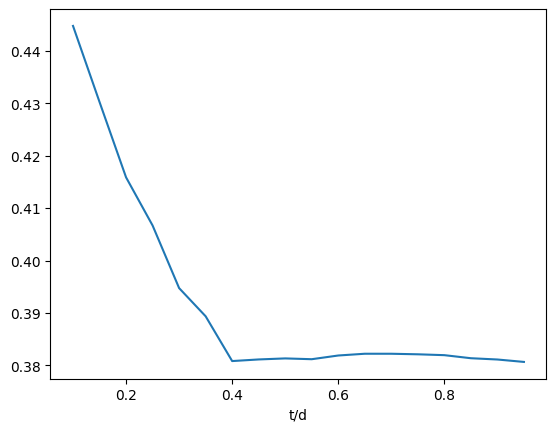

In [17]:
df.groupby(["t/d"]).mean()["target_err"].plot()

TypeError: Axes.annotate() missing 1 required positional argument: 'xy'

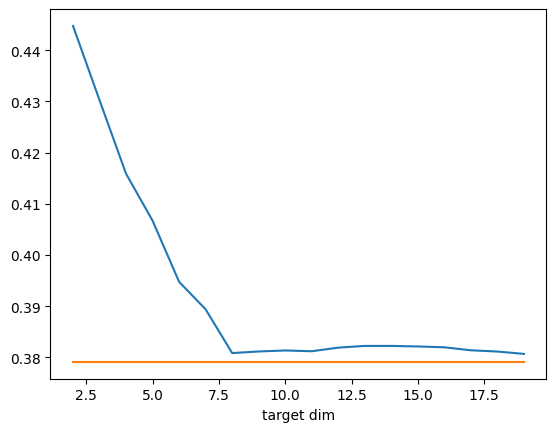

In [21]:
df.groupby("target dim").mean()["target_err"].plot()
df.groupby("target dim").mean()["base_err"].plot()
plt.show()